 Seattle - Airbnb Data Set.



In order to get a better grip over the Airbnb data set. Lets wrangle to get a better understanding, and prepare the data set.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

import numba
from numba import cuda

#### Loading the Datasets

In [33]:
airbnb_listing_df = pd.read_csv('Data/Airbnb_Seattle/seattle_airbnb_listing.csv')

airbnb_neighbourhood_df = pd.read_csv('Data/Airbnb_Seattle/seattle_airbnb_neighbourhoods.csv')

airbnb_neighbourhood_geojson_df = pd.read_csv('Data/Airbnb_Seattle/seattle_airbnb_neighbourhoods_geojson.csv')

airbnb_reviews_df = pd.read_csv('Data/Airbnb_Seattle/seattle_airbnb_reviews.csv')

#### Finding the Rows and Columns in the Dataframes

In [16]:
airbnb_listing_df.shape

(8740, 16)

In [17]:
airbnb_neighbourhood_df.shape

(90, 2)

In [31]:
airbnb_neighbourhood_geojson_df.shape

(90, 2)

In [32]:
airbnb_reviews_df.shape

(373096, 2)

#### Examning the dataframes

In [25]:
airbnb_listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2318,"Casa Madrona - Urban Oasis, 1 block from the P...",2536,Megan,Central Area,Madrona,47.610819,-122.290816,Entire home/apt,296,4,20,9/18/2018,0.16,3,345
1,4291,Sunrise in Seattle Master Suite,35749,Jess & Joey,Other neighborhoods,Roosevelt,47.687801,-122.313427,Private room,82,2,63,10/6/2018,0.96,5,365
2,5682,"Cozy Studio, min. to downtown -WiFi",8993,Maddy,Delridge,South Delridge,47.523979,-122.359891,Entire home/apt,48,3,461,11/2/2018,4.37,1,24
3,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.654109,-122.337605,Entire home/apt,90,2,134,10/21/2018,1.18,3,287
4,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.550620,-122.320135,Private room,65,2,130,9/9/2018,1.29,5,336


In [27]:
airbnb_neighbourhood_df.head()

,neighbourhood_group,neighbourhood
0,Ballard,Adams
1,Ballard,Loyal Heights
2,Ballard,Sunset Hill
3,Ballard,West Woodland
4,Ballard,Whittier Heights


In [29]:
airbnb_neighbourhood_geojson_df.head()

,neighbourhood_group,neighbourhood
0,Ballard,Adams
1,Ballard,Loyal Heights
2,Ballard,Sunset Hill
3,Ballard,West Woodland
4,Ballard,Whittier Heights


In [30]:
airbnb_reviews_df.head()

,listing_id,date
0,2318,2008-09-15
1,2318,2017-01-10
2,2318,2017-04-01
3,2318,2017-04-25
4,2318,2017-06-18


#### Testing Numba Library for GPU processing

In [20]:
print(cuda.gpus)

<Managed Device 0>


In [24]:
#thread id in 1D block

# blockwidth = number of threads per block
bw = cuda.blockDim
print(bw)


numba.cuda.stubs.blockDim

#### A Set Columns Names missing more than 50% of their values missing.

In [36]:
set(airbnb_listing_df.columns[airbnb_listing_df.isnull().mean() > .5])

set()

In [37]:
airbnb_listing_df.isnull().mean()

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.119908
reviews_per_month                 0.120023
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

#### Histogram Distribution of Neighbourhood Groups

Other neighborhoods    1641
Downtown               1509
Capitol Hill           1024
Central Area            762
Queen Anne              645
Ballard                 492
West Seattle            460
Rainier Valley          421
Beacon Hill             335
Cascade                 325
Delridge                247
University District     247
Northgate               214
Magnolia                164
Lake City               155
Seward Park              83
Interbay                 16
Name: neighbourhood_group, dtype: int64
Other neighborhoods    96.529412
Downtown               88.764706
Capitol Hill           60.235294
Central Area           44.823529
Queen Anne             37.941176
Ballard                28.941176
West Seattle           27.058824
Rainier Valley         24.764706
Beacon Hill            19.705882
Cascade                19.117647
Delridge               14.529412
University District    14.529412
Northgate              12.588235
Magnolia                9.647059
Lake City             

Text(0.5, 1.0, '# of Airbnb Listings in Neighbourhood Groups')

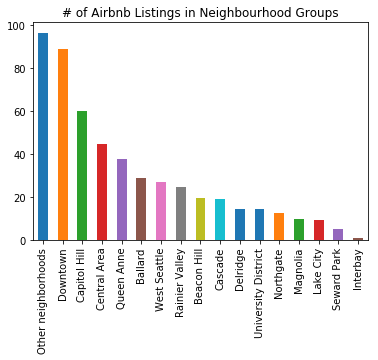

In [47]:
ngh_grp = airbnb_listing_df.neighbourhood_group.value_counts().sort_values(ascending = False)
print(ngh_grp)

print(ngh_grp/ngh_grp.shape[0])

(ngh_grp/ngh_grp.shape[0]).plot(kind = "bar")
plt.title("# of Airbnb Listings in Neighbourhood Groups")

#### Understanding the Listing Data
###### List of areas with highest Airbnb reviews in Seattle,WA

In [123]:
areas_and_reviews = airbnb_listing_df.groupby(by = ["number_of_reviews"])["neighbourhood_group","neighbourhood","number_of_reviews"].max()[::-1]
print(areas_and_reviews)


print(airbnb_listing_df.neighbourhood_group.unique().tolist())


""""
areas_and_reviews.plot(kind = "bar")
plt.title("Reviews on Airbnb for Areas in Seattle")
"""


                   neighbourhood_group              neighbourhood  \
number_of_reviews                                                   
717                           Downtown     International District   
703                           Downtown     International District   
683                            Ballard           Whittier Heights   
636                            Ballard           Whittier Heights   
513                     Rainier Valley                Mount Baker   
481                            Ballard                      Adams   
479                            Ballard                      Adams   
478                           Downtown  Central Business District   
477                Other neighborhoods                    Fremont   
476                       Central Area      Harrison/Denny-Blaine   
461                           Delridge             South Delridge   
453                           Downtown                   Belltown   
448                Other neighborh

'"\nareas_and_reviews.plot(kind = "bar")\nplt.title("Reviews on Airbnb for Areas in Seattle")\n'